In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

In [2]:
from db_conn import DbDriver

In [3]:
db = DbDriver()
db.connect_db()
df = db.query_excute('SELECT * FROM telegram_posts')
db.close_db()

Database connected
Database closed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype                    
---  ------       --------------  -----                    
 0   Date         149 non-null    datetime64[ns, UTC+03:00]
 1   post_id      149 non-null    int64                    
 2   post_link    149 non-null    object                   
 3   views        149 non-null    int64                    
 4   Post Hour    149 non-null    object                   
 5   Tag          149 non-null    object                   
 6   Bank         149 non-null    object                   
 7   Time of day  149 non-null    object                   
dtypes: datetime64[ns, UTC+03:00](1), int64(2), object(5)
memory usage: 9.4+ KB


In [5]:
df.head()

,Date,post_id,post_link,views,Post Hour,Tag,Bank,Time of day
0,2023-01-25 11:38:24+03:00,76075,https://t.me/tikvahethiopia/76075,299132,08:38 AM,Apollodigitalproduct,BOA,NaN
1,2023-01-26 09:49:54+03:00,76089,https://t.me/tikvahethiopia/76089,129464,06:49 AM,Apollodigitalproduct,BOA,NaN
2,2023-01-28 20:28:59+03:00,76176,https://t.me/tikvahethiopia/76176,347725,05:28 PM,Apollodigitalproduct,BOA,NaN
3,2023-01-30 14:00:01+03:00,76186,https://t.me/tikvahethiopia/76186,365370,11:00 AM,Apollodigitalproduct,BOA,NaN
4,2023-01-31 20:32:27+03:00,76193,https://t.me/tikvahethiopia/76193,356196,05:32 PM,Apollodigitalproduct,BOA,NaN


In [6]:
df.groupby('Bank').count()

,Date,post_id,post_link,views,Post Hour,Tag,Time of day
Bank,,,,,,,
BOA,77,77,77,77,77,77,77
CBE,55,55,55,55,55,55,55
GBE,17,17,17,17,17,17,17


In [7]:
# Importing old data to see how Time of day assigned
old_df = pd.read_csv('../data/BANKS AD DATA.csv')
old_df.head()

,Date,Post link,View,Post Hour,Bank,Time of day
0,26/9/2023,https://t.me/tikvahethiopia/81734,239800,10:18,BOA,night
1,19/9/2023,https://t.me/tikvahethiopia/81606,258400,6:53,BOA,night
2,15/9/2023,https://t.me/tikvahethiopia/81502,269400,3:56,BOA,evening
3,8/9/2023,https://t.me/tikvahethiopia/81338,219400,10:50,BOA,afternoon
4,5/9/2023,https://t.me/tikvahethiopia/81252,255900,1:19,BOA,afternoon


In [8]:
old_df['Date'] = pd.to_datetime(old_df['Date'])
old_df.set_index('Date', inplace=True)

/tmp/ipykernel_9776/1652932554.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  old_df['Date'] = pd.to_datetime(old_df['Date'])


In [9]:
old_df.groupby('Time of day').min()

,Post link,View,Post Hour,Bank
Time of day,,,,
afternoon,https://t.me/tikvahethiopia/4722,160400,10:20,BOA
evening,https://t.me/tikvahethiopia/5339,170200,11:38,BOA
morning,https://t.me/tikvahethiopia/66171,207900,3:10,BOA
night,https://t.me/tikvahethiopia/76089,129400,10:18,BOA


In [10]:
old_df.groupby('Time of day').max()

,Post link,View,Post Hour,Bank
Time of day,,,,
afternoon,https://t.me/tikvahethiopia/81338,259400,9:02,BOA
evening,https://t.me/tikvahethiopia/81502,299100,9:32,BOA
morning,https://t.me/tikvahethiopia/68651,249700,4:43,BOA
night,https://t.me/tikvahethiopia/81734,258400,9:49,BOA


In [11]:
df.head()

,Date,post_id,post_link,views,Post Hour,Tag,Bank,Time of day
0,2023-01-25 11:38:24+03:00,76075,https://t.me/tikvahethiopia/76075,299132,08:38 AM,Apollodigitalproduct,BOA,NaN
1,2023-01-26 09:49:54+03:00,76089,https://t.me/tikvahethiopia/76089,129464,06:49 AM,Apollodigitalproduct,BOA,NaN
2,2023-01-28 20:28:59+03:00,76176,https://t.me/tikvahethiopia/76176,347725,05:28 PM,Apollodigitalproduct,BOA,NaN
3,2023-01-30 14:00:01+03:00,76186,https://t.me/tikvahethiopia/76186,365370,11:00 AM,Apollodigitalproduct,BOA,NaN
4,2023-01-31 20:32:27+03:00,76193,https://t.me/tikvahethiopia/76193,356196,05:32 PM,Apollodigitalproduct,BOA,NaN


In [12]:
def apply_time_day(hr):
    if hr >= '06:00 AM' and hr <= '11:59 AM':
        return 'morning'
    elif hr >= '12:00 PM' and hr <= '06:59 PM':
        return 'afternoon'
    elif hr >= '07:00 PM' and hr <= '11:59 PM':
        return 'evening'
    else:
        return 'night'

In [13]:
df['Time of day'] = df['Post Hour'].apply(apply_time_day)
df.head()

,Date,post_id,post_link,views,Post Hour,Tag,Bank,Time of day
0,2023-01-25 11:38:24+03:00,76075,https://t.me/tikvahethiopia/76075,299132,08:38 AM,Apollodigitalproduct,BOA,morning
1,2023-01-26 09:49:54+03:00,76089,https://t.me/tikvahethiopia/76089,129464,06:49 AM,Apollodigitalproduct,BOA,morning
2,2023-01-28 20:28:59+03:00,76176,https://t.me/tikvahethiopia/76176,347725,05:28 PM,Apollodigitalproduct,BOA,night
3,2023-01-30 14:00:01+03:00,76186,https://t.me/tikvahethiopia/76186,365370,11:00 AM,Apollodigitalproduct,BOA,morning
4,2023-01-31 20:32:27+03:00,76193,https://t.me/tikvahethiopia/76193,356196,05:32 PM,Apollodigitalproduct,BOA,night


# Time Series Analaysis

## BOA

In [14]:
boa = df[df['Bank'] == 'BOA']
boa.set_index('Date', inplace=True)

<AxesSubplot:title={'center':'views between 2023 - 2024/5/24'}, xlabel='Date', ylabel='Views'>

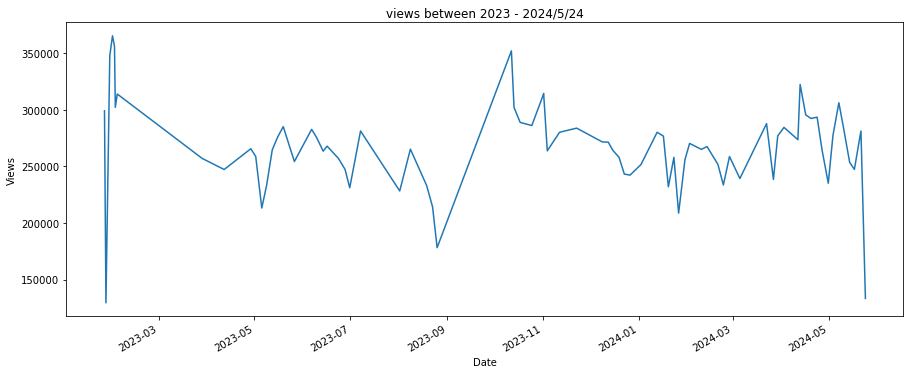

In [15]:
boa['views'].plot(ylabel="Views", title="views between 2023 - 2024/5/24",figsize=(15,6))

# GBE

In [16]:
gbe = df[df['Bank'] == 'GBE']
gbe.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date', ylabel='Views'>

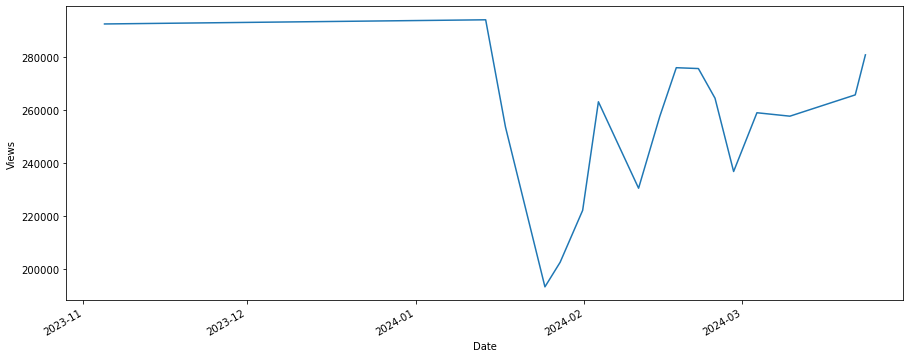

In [31]:
gbe['views'].plot(figsize=(15,6), ylabel="Views")

In [24]:
gbe.groupby('Time of day')['post_id'].count()


Time of day
morning    9
night      8
Name: post_id, dtype: int64

<AxesSubplot:xlabel='Date'>

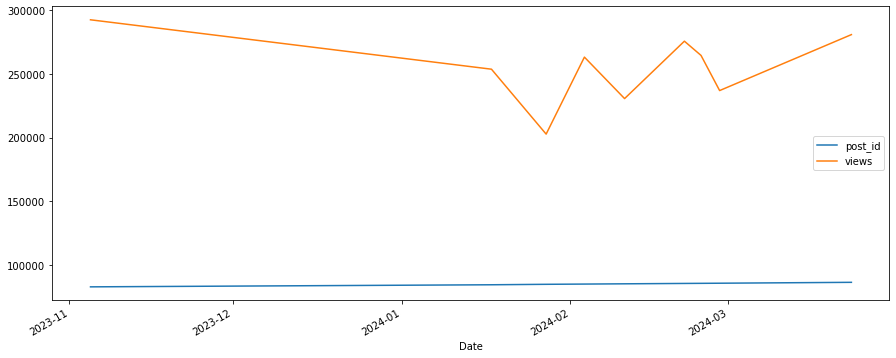

In [28]:
gbe[gbe['Time of day'] == 'morning'].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

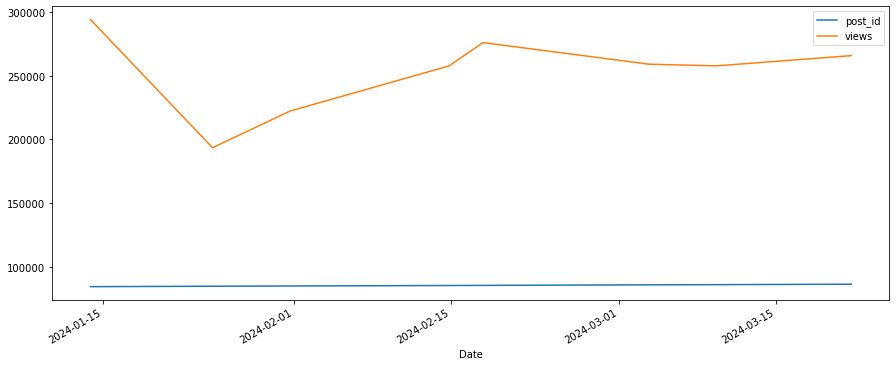

In [30]:
gbe[gbe['Time of day'] == 'night'].plot(figsize=(15,6))

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Histogram')

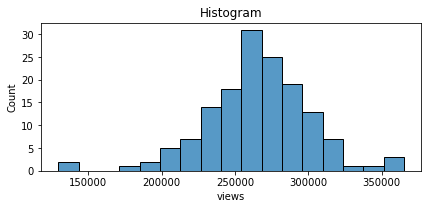

In [18]:

import seaborn as sns

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.histplot(df['views'], kde=False)
plt.title('Histogram')